## Extracting the text from different file Sources

* Image
* PDF
* DOCX

### Extracting text from Images:

#### OCR(Optical Character Recognization)

In [1]:
pip install pytesseract opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [3]:
# Lets load and process an image

image = cv2.imread('Capture1.PNG')


In [4]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

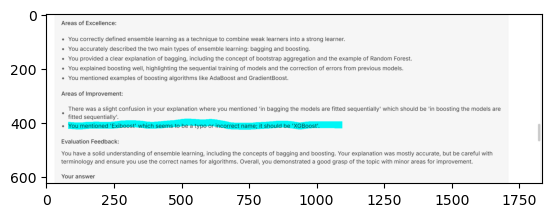

In [5]:
plt.imshow(image)

In [6]:
image = cv2.imread('notes.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # To convert RGB to Grayscale

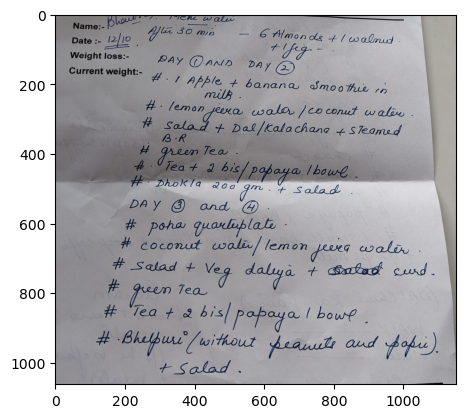

In [7]:
plt.imshow(image)

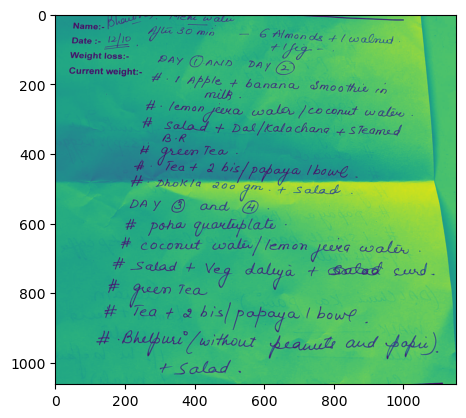

In [8]:
plt.imshow(image_gray)

In [9]:
cv2.imshow('Gray Image', image_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
_,image_bw = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY) # To convert grayscale image to binary

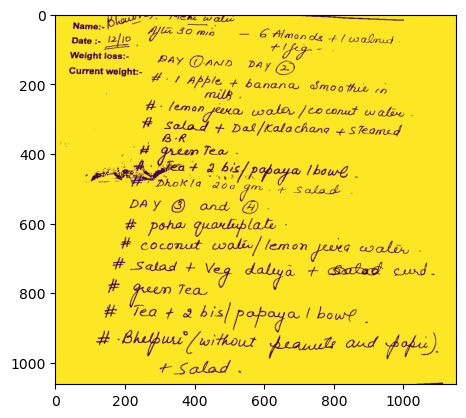

In [19]:
plt.imshow(image_bw)

In [20]:
cv2.imshow('Binary Image', image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' # Path to the Tesseract executable

In [23]:
pytesseract.image_to_string(image_bw)

'out! Ae INORG tt ahecd\nye —— ¢\nName:. © Yu FO mA\nDate :- [2/10 ’\n\nWeight loss:- Pay O.anta\nCurrent weight:-\n\n— 6 Almon ole +l wabnud .\ntlfheg- .\nDay @)\nwos APP’ + bananew Smoother wn\n#4. (emon pea walt (Coconut walkin .\n# Selad + Dek/kalachane ~ Steamed\n\nTea .\n\n+ 2 4:5 popaya lbaurd, -\n\n# coconut wali/ lemon 6G wali, .\n# Salad + Veg dala + Gaba curd.\n# rea 7 “4\n# fea + 2 bis/ pop a! bow? -\n'

In [24]:
print(pytesseract.image_to_string(image_bw))

out! Ae INORG tt ahecd
ye —— ¢
Name:. © Yu FO mA
Date :- [2/10 ’

Weight loss:- Pay O.anta
Current weight:-

— 6 Almon ole +l wabnud .
tlfheg- .
Day @)
wos APP’ + bananew Smoother wn
#4. (emon pea walt (Coconut walkin .
# Selad + Dek/kalachane ~ Steamed

Tea .

+ 2 4:5 popaya lbaurd, -

# coconut wali/ lemon 6G wali, .
# Salad + Veg dala + Gaba curd.
# rea 7 “4
# fea + 2 bis/ pop a! bow? -



In [25]:
image = cv2.imread('Capture1.PNG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # To convert RGB to Grayscale
_,image_bw = cv2.threshold(image_gray, 100, 255, cv2.THRESH_BINARY) # To convert grayscale image to binary
print(pytesseract.image_to_string(image_bw))

Areas of Excellence:

* You correctly defined ensemble learning as a technique to combine weak learners into a strong learner.

* You accurately described the two main types of ensemble learning: bagging and boosting.

* You provided a clear explanation of bagging, including the concept of bootstrap aggregation and the example of Random Forest.
* You explained boosting well, highlighting the sequential training of models and the correction of errors from previous models.

* You mentioned examples of boosting algorithms like AdaBoost and GradientBoost.
Areas of Improvement:

There was a slight confusion in your explanation where you mentioned ‘in bagging the models are fitted sequentially’ which should be ‘in boosting the models are
fitted sequentially’.

* You mentioned 'Exiboost' which seems to be a typo or incorrect name; it should be 'XGBoost'.

Evaluation Feedback:

You have a solid understanding of ensemble learning, including the concepts of bagging and boosting. Your explanation

Note:

* tesseract is working fine when we have a clear image with typed characters. But as we are giving any image of handwritten text that is extracting is not good enough.
* Lets try another approach and use LLM model as OCR, we will compare the results and see.

In [26]:
import google.generativeai as genai
import os

In [27]:
key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=key)

In [28]:
model = genai.GenerativeModel('gemini-2.5-flash-lite')

In [29]:
prompt='''You act as an OCR application on the given image and extract the text from it.
        Give only the text as output, do not give any other explanation or description.'''

In [31]:
# Lets load the image and extract text using the LLM model
image = cv2.imread('notes.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # To convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # To convert RGB to Grayscale
_,image_bw = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY) # To convert grayscale image to binary

In [34]:
# The image that CV2 gives is in numpy array format, we need to convert it to a format to image object.
from PIL import Image
final_image = Image.fromarray(image_bw)

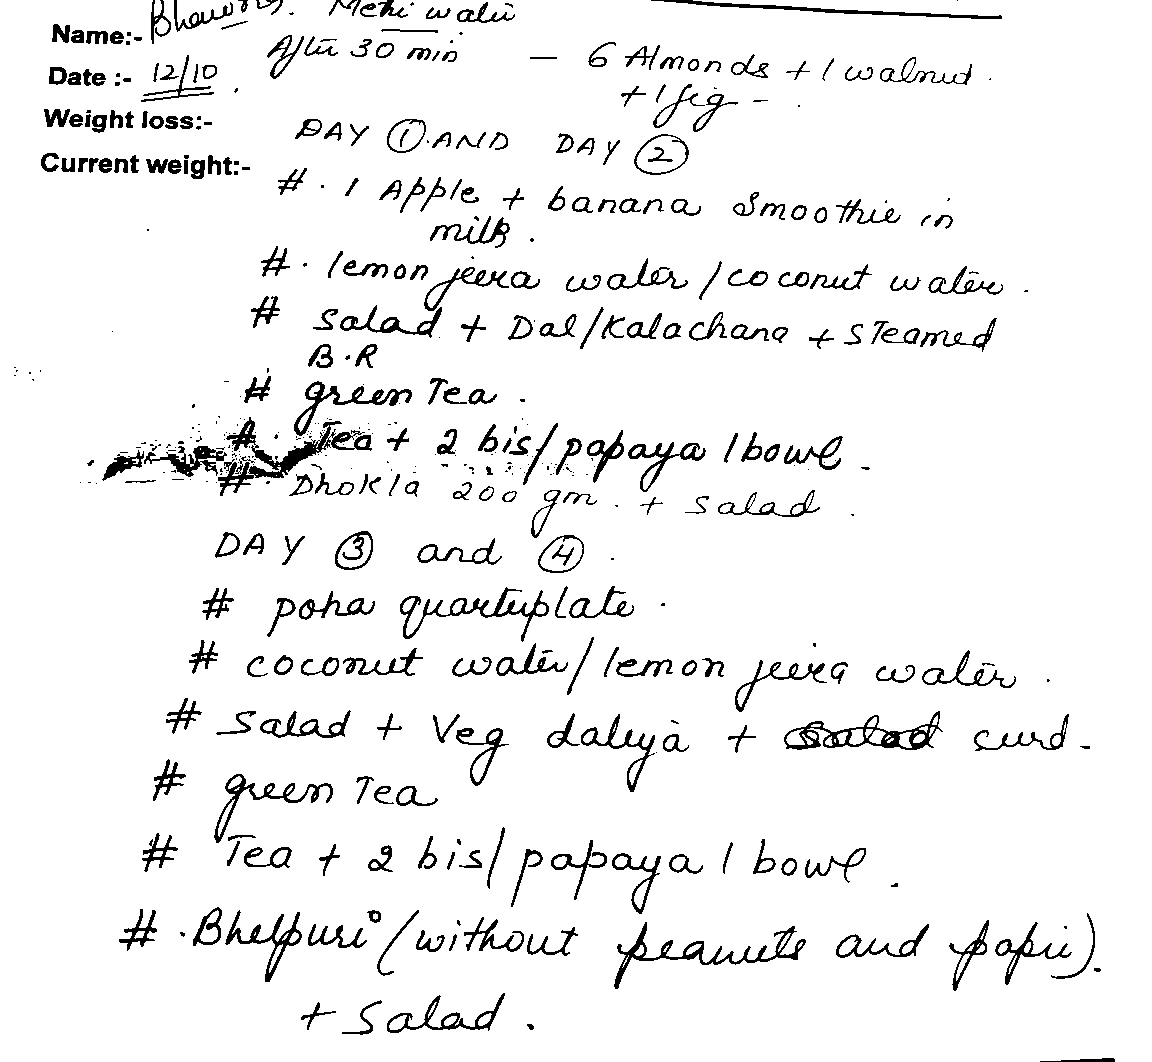

In [35]:
final_image

In [40]:
response=model.generate_content([prompt,final_image])
output_text = response.text
print(output_text)

Name:- Bhawan, Methi walu
Date:- 12/10 After 30 min - 6 Almonds + 1 walmut.
Weight loss:- +1 fig -
Current weight:- DAY ① AND DAY ②
#.1 Apple + banana Smoothie in
milk.
#. lemon jeera water / coconut water.
# Salad + Dal/Kalachana +Steamed
B.R
# green Tea.
# Tea + 2 bis/papaya 1 bowl.
# Dhokla 200 gm. + Salad.
DAY ③ and ④.
# poha quartuplate.
# coconut water/lemon jeera water.
# Salad + Veg daliya + Salad curd.
# green Tea
# Tea + 2 bis/papaya 1 bowl.
# Bhelpuri (without peanuts and papri).
+ Salad.


Note:

* OCR based on LLM model seems to be better option to extract text even from the handwritten notes. It may not able to extract 100% but still giving us better output than expected

### Extract Text from DOCX(Word document)

In [41]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [42]:
from docx import Document

In [43]:
file = Document('STATS.docx')

In [44]:
file

In [45]:
file.paragraphs[1].text

''

In [46]:
file.paragraphs[12].text

'4. What are skewness and kurtosis?'

In [ ]:
[p.text for p in file.paragraphs]

['STATISTICS ',
 '',
 'Descriptive Statistics',
 '1. What is the difference between population and sample?',
 'Population refers to the entire group being studied, while a sample is a subset of the population used for analysis.',
 '2. What are mean, median, and mode?',
 'Mean: The average of all values.',
 'Median: The middle value when arranged in order.',
 'Mode: The most frequently occurring value.',
 '3. What is the difference between variance and standard deviation?',
 'Variance measures how far data points are from the mean, squared.',
 'Standard deviation is the square root of variance, making it more interpretable in the same units as the data.',
 '4. What are skewness and kurtosis?',
 'Skewness: Measures the asymmetry of the data distribution.',
 'Positive skew → right tail is longer.',
 'Negative skew → left tail is longer.',
 'Kurtosis: Measures the "tailedness" of the distribution.',
 'High kurtosis → more outliers (leptokurtic).',
 'Low kurtosis → fewer outliers (platykurt

In [48]:
text_extracted=' '.join([p.text for p in file.paragraphs])

In [49]:
print(text_extracted)

STATISTICS   Descriptive Statistics 1. What is the difference between population and sample? Population refers to the entire group being studied, while a sample is a subset of the population used for analysis. 2. What are mean, median, and mode? Mean: The average of all values. Median: The middle value when arranged in order. Mode: The most frequently occurring value. 3. What is the difference between variance and standard deviation? Variance measures how far data points are from the mean, squared. Standard deviation is the square root of variance, making it more interpretable in the same units as the data. 4. What are skewness and kurtosis? Skewness: Measures the asymmetry of the data distribution. Positive skew → right tail is longer. Negative skew → left tail is longer. Kurtosis: Measures the "tailedness" of the distribution. High kurtosis → more outliers (leptokurtic). Low kurtosis → fewer outliers (platykurtic). 5. What is the difference between a parameter and a statistic? Parame